# Project Overview

## Predicting Project Role Suitability for Software Engineering Course Using Machine Learning Techniques

### Short Problem Description
    Predicting the suited software engineering role of a student taking up software engineering course at the WESTERN MINDANAO STATE UNIVERSITY-COLLEGE OF COMPUTING STUDIES.
    The 5 roles are: 
        -Project Manager
        -Lead Developer
        -Business Analyst
        -UI/UX Designer
        -Quality Assuarance Engineer

### Data was gathered from 3rd and 4th year studends of the COLLEGE OF COMPUTING STUDIES of the academic year 2021-2022.
        
### Description of columns/feautures
    The main feautures:
        -Program: The program/course of a student e.g. BS in Computer Science
        -COMPROG1: The grade of the student in this subject which is the Computer Programming 1
        -COMPROG2: The grade of the student in this subject which is the Computer Programming 2
        -INTRO TO COMPUTING: The grade of the student in this subject which is the INTRODUCTION TO COMPUTING
        -INFO MANAGEMENT: The grade of the student in this subject which is the INFORMATION MANAGEMENT
        -OOP: The grade of the student in this subject which is the OBJECT ORIENTED PROGRAMMING
        -HCI: The grade of the student in this subject which is the HUMAN COMPUTER INTERACTION
        -DATA STRUCTURES AND ALGO: The grade of the student in this subject which is the DATA STRUCTURES AND ALGORITHM
        -PERSONALITY TYPE TEST RESULT: The personality type of the student e.g. ENFJ
        -MULTIPLE INTELLIGENCE RESULT: The multiple intelligence/s of the student. e.g. Logical
        
    The derived feautures:
        -COMPROG1_4_units: The sum of the grade and number of units in the subject Computer Programming 1
        -COMPROG2_4_units: The sum of the grade and number of units in the subject Computer Programming 2
        -INTRO_TO_COMPUTING_3_units: The sum of the grade and number of units in the subject INTRODUCTION TO COMPUTING
        -INFO_MANAGEMENT_4_units: The sum of the grade and number of units in the subject INFORMATION MANAGEMENT
        -OOP_4_units: The sum of the grade and number of units in the subject OBJECT ORIENTED PROGRAMMING
        -HCI_1_units: The sum of the grade and number of units in the subject HUMAN COMPUTER INTERACTION
        -DATA STRUCTURES_AND_ALGO_4_units: The sum of the grade and number of units in the subject DATA STRUCTURES AND ALGORITHM 
        -Programming_AVG: The average grade of the 4 programming courses which are Computer Programming 1, Computer Programming 2, INFORMATION MANAGEMENT, and OBJECT ORIENTED PROGRAMMING
        -GPA: The General Percentile Average of the 7 common major subjects of BSCS and BSIT students.
    
    The dependent/output variables:
        -MAIN_ROLE: Main role of the student in the Software Engineering Course.
        -SECONDARY_ROLE: Secondary role of the student in the Software Engineering Course.

### General Objective:
    The general objective of this study is to develop software to predict which is the best role suited for students who are taking software engineering courses within the College of Computing Studies at Western Mindanao State University.

### Specific Objectives: 
    1.	To create 3 different classification machine learning models (Logistic regression, Naïve Bayes, and Decision tree) to predict the best role suited for students who are taking software engineering courses,
    2.	To compare each created machine learning models using k-fold cross-validation and identity which has the highest score,
    3.	To evaluate the 3 different models using evaluation metrics such as accuracy and confusion matrix,
    4.	To integrate the highest predictive machine learning model into the system called “BeSER”, 
    5.	To, develop “BeSER” a system that stands for “Best Software Engineering Role” for computer science and IT students who are taking up software engineering courses to help them decide on which role is best suited for them.



# Exploring dataset and performing pre-processing.

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import missingno as msno

#IMPORTS OHD FOR CONVERTING CLASSIFICATION FEATURES INTO NUMERICAL FEATURES.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#IMPORTING CSV FILE INTO DATA FRAME
df = pd.read_csv('FINAL-CSV(main-role-no-data-aug).csv')

In [3]:
df

Name  Program  COMPROG 1  COMPROG 2  INTRO TO COMPUTING  \
0     AbiegailAmparo        0       1.50       1.75                2.00   
1            AGCAOLI        0       1.75       2.00                1.75   
2       ALBIENABARRO        0       1.50       2.00                1.50   
3           AmerEmam        0       1.75       2.25                2.25   
4              ANDAN        1       2.25       1.75                1.50   
..               ...      ...        ...        ...                 ...   
67           SEVILLA        1       1.25       3.00                2.00   
68  SHERVINFERNANDEZ        0       2.50       2.00                1.25   
69             TUBAN        0       2.00       2.00                1.75   
70             USMAN        0       1.75       2.50                1.25   
71    YVANJOETINGUHA        0       2.00       1.50                2.75   

    INFO MANAGEMENT   OOP   HCI  DATA STRUCTURES AND ALGO  COMPROG1_4_units  \
0              2.50  1.75  1.75                      1.25                 6   
1              2.75  1.75  1.50                      1.75                 7   
2              3.00  2.00  2.50                      1.50                 6   
3              1.50  2.50  3.00                      1.50                 7   
4              2.75  1.75  2.50                      1.50                 9   
..              ...   ...   ...                       ...               ...   
67             2.75  2.00  2.00                      2.00                 5   
68             2.75  2.50  2.00                      2.25                10   
69             2.50  2.00  2.25                      1.50                 8   
70             2.00  2.25  2.50                      2.50                 7   
71             3.00  1.75  2.00                      1.50                 8   

    ...  INTRO_TO_COMPUTING_3_units  INFO_MANAGEMENT_4_units  OOP_4_units  \
0   ...                        6.00                       10            7   
1   ...                        5.25                       11            7   
2   ...                        4.50                       12            8   
3   ...                        6.75                        6           10   
4   ...                        4.50                       11            7   
..  ...                         ...                      ...          ...   
67  ...                        6.00                       11            8   
68  ...                        3.75                       11           10   
69  ...                        5.25                       10            8   
70  ...                        3.75                        8            9   
71  ...                        8.25                       12            7   

    HCI_1_units  DATA STRUCTURES_AND_ALGO_4_units  Programming_AVG   GPA  \
0          1.75                                 5             1.88  1.78   
1          1.50                                 7             2.06  1.95   
2          2.50                                 6             2.13  1.96   
3          3.00                                 6             2.00  1.99   
4          2.50                                 6             2.13  1.96   
..          ...                               ...              ...   ...   
67         2.00                                 8             2.25  2.17   
68         2.00                                 9             2.44  2.24   
69         2.25                                 6             2.13  1.98   
70         2.50                                10             2.13  2.09   
71         2.00                                 6             2.06  2.05   

    PERSONALITY TYPE TEST RESULT MULTIPLE INTELLIGENCE RESULT  \
0                           ESFJ                       VISUAL   
1                           INFP                 NATURALISTIC   
2                           ESTP                      MUSICAL   
3                           ESTP                 NATURALISTIC   
4  

In [4]:
df.shape
df.isnull().sum()

Name                                0
Program                             0
COMPROG 1                           0
COMPROG 2                           0
INTRO TO COMPUTING                  0
INFO MANAGEMENT                     0
OOP                                 0
HCI                                 0
DATA STRUCTURES AND ALGO            0
COMPROG1_4_units                    0
COMPROG2_4_units                    0
INTRO_TO_COMPUTING_3_units          0
INFO_MANAGEMENT_4_units             0
OOP_4_units                         0
HCI_1_units                         0
DATA STRUCTURES_AND_ALGO_4_units    0
Programming_AVG                     0
GPA                                 0
PERSONALITY TYPE TEST RESULT        0
MULTIPLE INTELLIGENCE RESULT        0
MAIN ROLE                           0
dtype: int64

<AxesSubplot:>

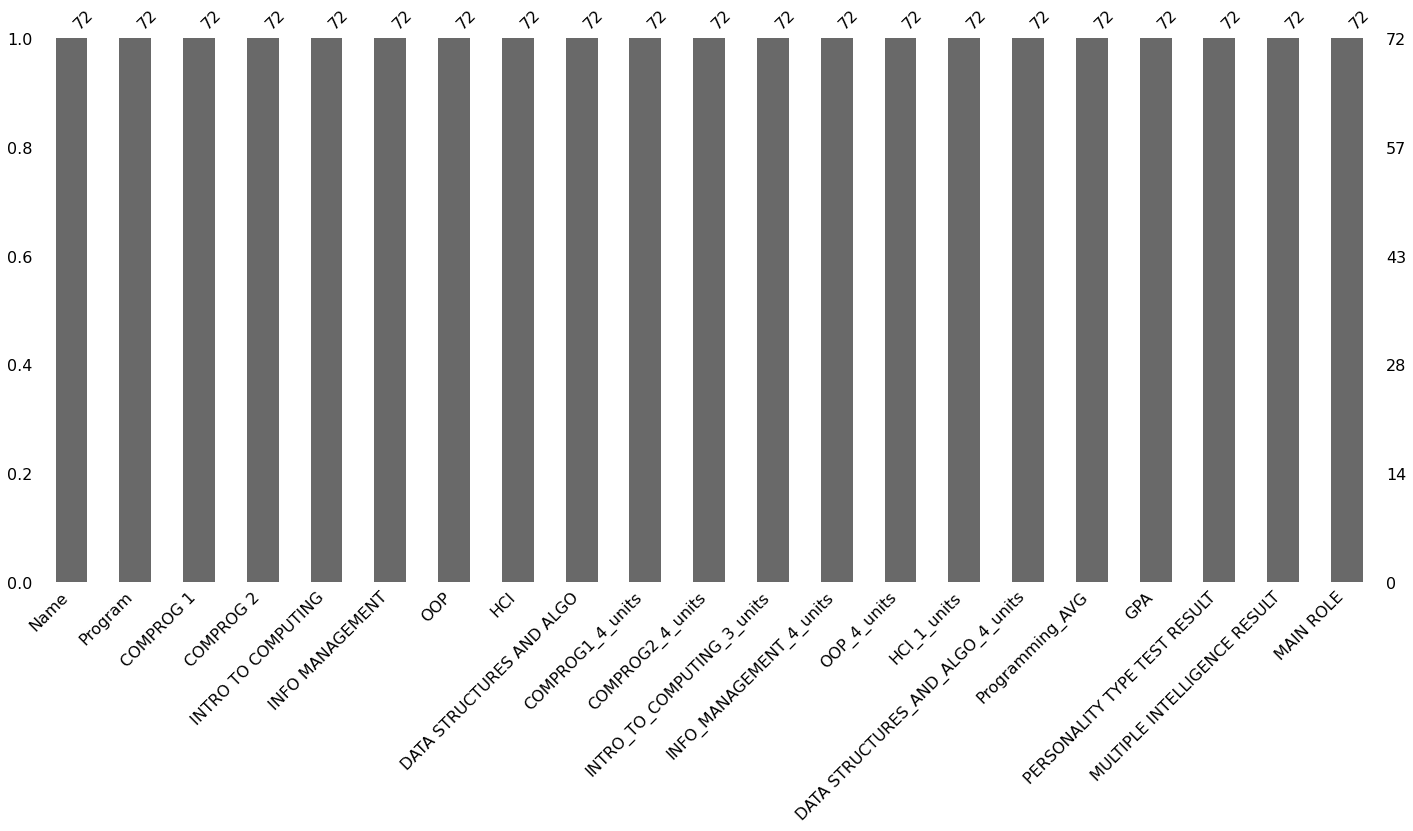

In [5]:
msno.bar(df)

In [6]:
df["PERSONALITY TYPE TEST RESULT"].unique()

array(['ESFJ', 'INFP', 'ESTP', 'ESTJ', 'ISFP', 'ISTJ', 'ISFJ', 'INTP',
       'ENTP', 'ESFP', 'ENTJ', 'ISTP', 'INFJ'], dtype=object)

In [7]:
df["MULTIPLE INTELLIGENCE RESULT"].unique()

array(['VISUAL', 'NATURALISTIC', 'MUSICAL', 'MUSICAL&NATURALISTIC',
       'MUSICAL&VISUAL', 'VISUAL&MUSICAL', 'LOGICAL&MUSICAL',
       'NATURALISTIC&VERBAL', 'LOGICAL&NATURALISTIC', 'LOGICAL', 'VERBAL',
       'NATURALISTIC&VISUAL', 'INTERPERSONAL', 'INTERPERSONAL&MUSICAL',
       'VERBAL&INTERPERSONAL', 'VISUAL&INTERPERSONAL&MUSICAL',
       'LOGICAL&INTERPERSONAL', 'LOGICAL&VISUAL&MUSICAL&NATURALISTIC',
       'VERBAL&LOGICAL', 'MUSICAL&INTERPERSONAL',
       'VISUAL&MUSICAL&NATURALISTIC', 'VISUAL&NATURALISTIC',
       'LOGICAL&VISUAL'], dtype=object)

In [8]:
df["MAIN ROLE"].unique()

array(['PROJECT MANAGER', 'LEAD PROGRAMMER', 'BUSINESS ANALYST',
       'QA ENGINEER', 'UI/UX DESIGNER'], dtype=object)

In [9]:
df.isna().sum()

Name                                0
Program                             0
COMPROG 1                           0
COMPROG 2                           0
INTRO TO COMPUTING                  0
INFO MANAGEMENT                     0
OOP                                 0
HCI                                 0
DATA STRUCTURES AND ALGO            0
COMPROG1_4_units                    0
COMPROG2_4_units                    0
INTRO_TO_COMPUTING_3_units          0
INFO_MANAGEMENT_4_units             0
OOP_4_units                         0
HCI_1_units                         0
DATA STRUCTURES_AND_ALGO_4_units    0
Programming_AVG                     0
GPA                                 0
PERSONALITY TYPE TEST RESULT        0
MULTIPLE INTELLIGENCE RESULT        0
MAIN ROLE                           0
dtype: int64

In [10]:
df.drop(columns = ['Name'], inplace=True)

In [11]:
df

Program  COMPROG 1  COMPROG 2  INTRO TO COMPUTING  INFO MANAGEMENT   OOP  \
0         0       1.50       1.75                2.00             2.50  1.75   
1         0       1.75       2.00                1.75             2.75  1.75   
2         0       1.50       2.00                1.50             3.00  2.00   
3         0       1.75       2.25                2.25             1.50  2.50   
4         1       2.25       1.75                1.50             2.75  1.75   
..      ...        ...        ...                 ...              ...   ...   
67        1       1.25       3.00                2.00             2.75  2.00   
68        0       2.50       2.00                1.25             2.75  2.50   
69        0       2.00       2.00                1.75             2.50  2.00   
70        0       1.75       2.50                1.25             2.00  2.25   
71        0       2.00       1.50                2.75             3.00  1.75   

     HCI  DATA STRUCTURES AND ALGO  COMPROG1_4_units  COMPROG2_4_units  \
0   1.75                      1.25                 6                 7   
1   1.50                      1.75                 7                 8   
2   2.50                      1.50                 6                 8   
3   3.00                      1.50                 7                 9   
4   2.50                      1.50                 9                 7   
..   ...                       ...               ...               ...   
67  2.00                      2.00                 5                12   
68  2.00                      2.25                10                 8   
69  2.25                      1.50                 8                 8   
70  2.50                      2.50                 7                10   
71  2.00                      1.50                 8                 6   

    INTRO_TO_COMPUTING_3_units  INFO_MANAGEMENT_4_units  OOP_4_units  \
0                         6.00                       10            7   
1                         5.25                       11            7   
2                         4.50                       12            8   
3                         6.75                        6           10   
4                         4.50                       11            7   
..                         ...                      ...          ...   
67                        6.00                       11            8   
68                        3.75                       11           10   
69                        5.25                       10            8   
70                        3.75                        8            9   
71                        8.25                       12            7   

    HCI_1_units  DATA STRUCTURES_AND_ALGO_4_units  Programming_AVG   GPA  \
0          1.75                                 5             1.88  1.78   
1          1.50                                 7             2.06  1.95   
2          2.50                                 6             2.13  1.96   
3          3.00                                 6             2.00  1.99   
4          2.50                                 6             2.13  1.96   
..          ...                               ...              ...   ...   
67         2.00                                 8             2.25  2.17   
68         2.00                                 9             2.44  2.24   
69         2.25                                 6             2.13  1.98   
70         2.50                                10             2.13  2.09   
71         2.00                                 6             2.06  2.05   

   PERSONALITY TYPE TEST RESULT MULTIPLE INTELLIGENCE RESULT         MAIN ROLE  
0                          ESFJ                       VISUAL   PROJECT MANAGER  
1                          INFP                 NATURALISTIC   LEAD PROGRAMMER  
2                          ESTP                      MUSICAL  BUSINESS ANALYST  
3                          ESTP                 NATU

# Data Visualization

In [12]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from pandas import DataFrame


<function matplotlib.pyplot.show(close=None, block=None)>

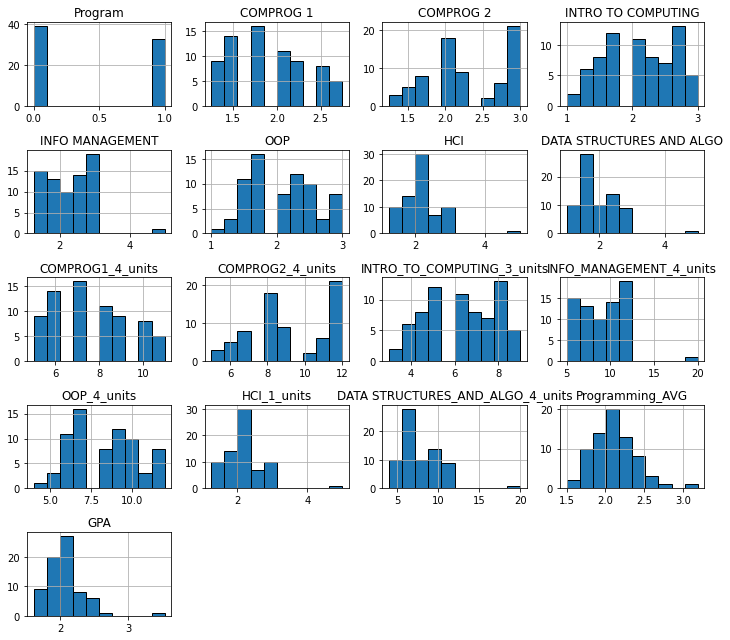

In [13]:
#plot histogram of raw data
df.hist(figsize=(10,9), ec="k")
plt.title('Raw SE Role Data')
plt.tight_layout()
plt.show

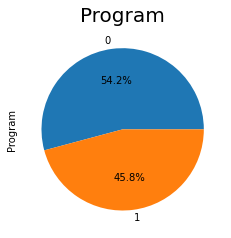

In [14]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Program',fontsize = 20)
df['Program'].value_counts().plot.pie(autopct="%1.1f%%")

plt.show()

#Based on the number of respondents (real data) and.
# 0 for BS in Information Technology and 1 for BS in Computer Science

C:\Users\drene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


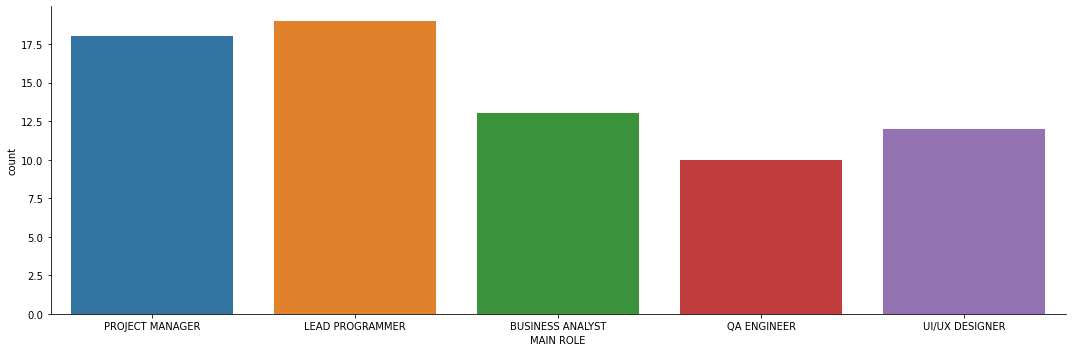

In [15]:
sns.catplot('MAIN ROLE', data=df, kind='count', aspect=12/4)


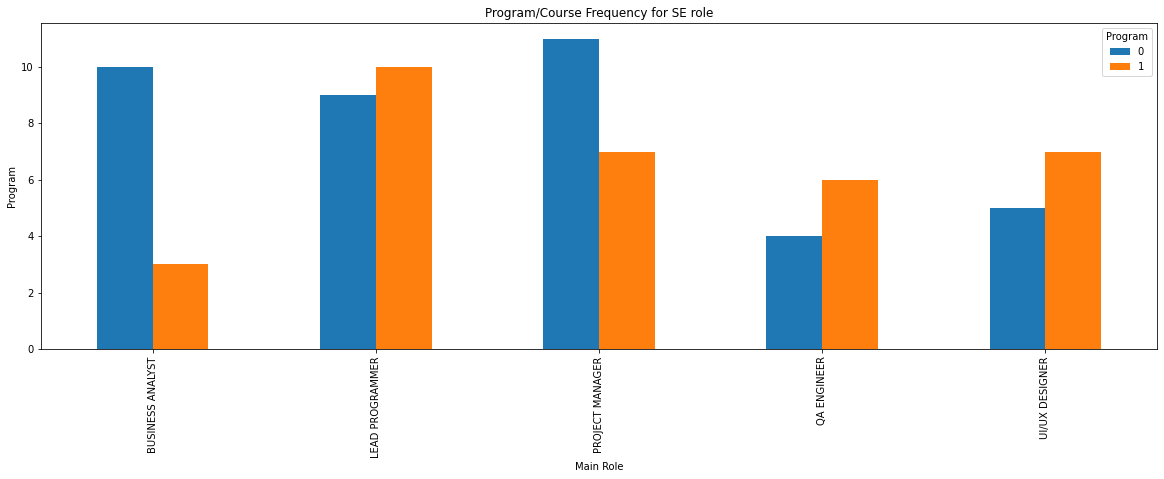

In [16]:
pd.crosstab(df['MAIN ROLE'],df.Program).plot(kind="bar",figsize=(20,6))
plt.title('Program/Course Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Program')
plt.show()

# Program: 0 for BS in Information Technology and 1 for BS in Computer Science

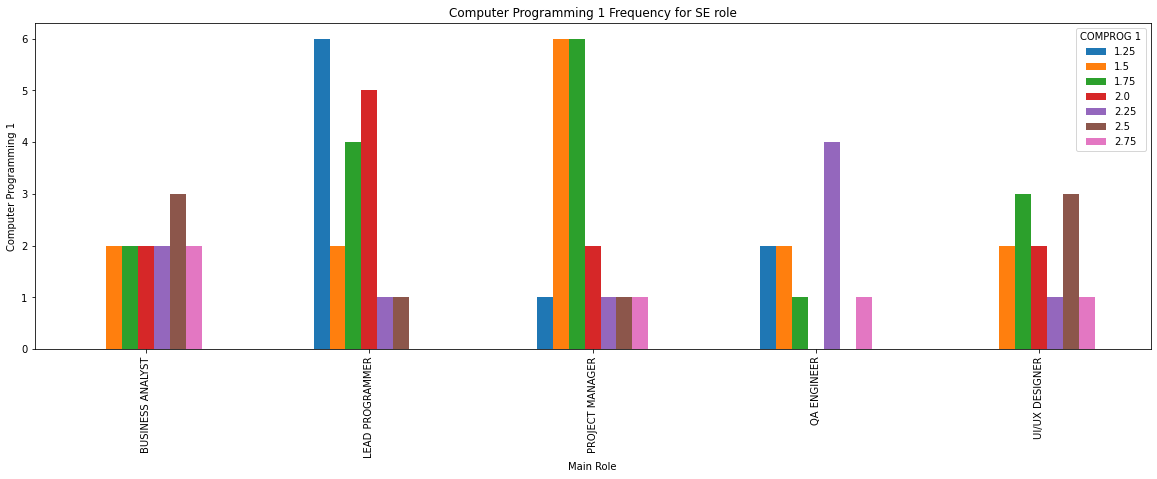

In [17]:
pd.crosstab(df['MAIN ROLE'],df['COMPROG 1']).plot(kind="bar",figsize=(20,6))
plt.title('Computer Programming 1 Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Computer Programming 1')
plt.show()

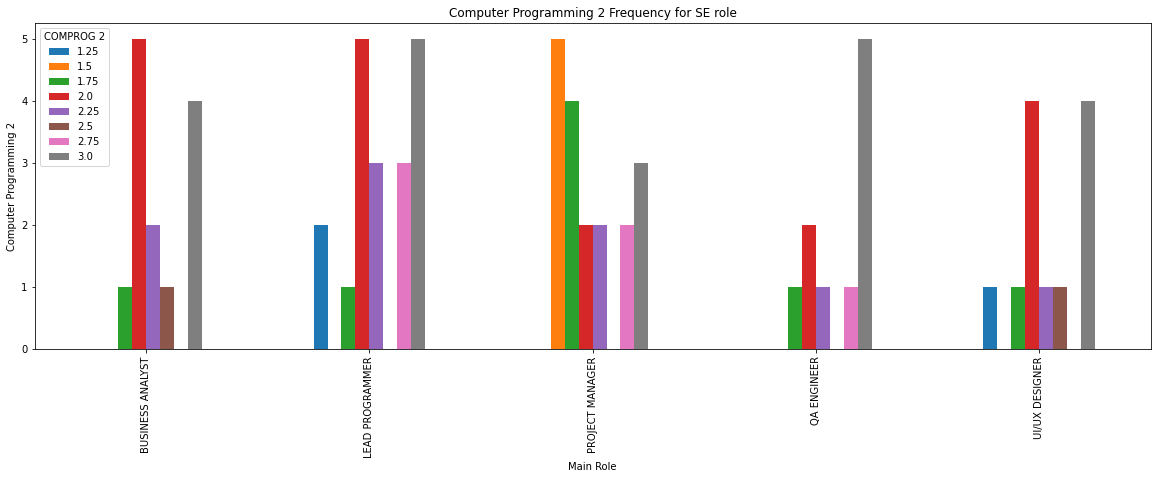

In [18]:
pd.crosstab(df['MAIN ROLE'],df['COMPROG 2']).plot(kind="bar",figsize=(20,6))
plt.title('Computer Programming 2 Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Computer Programming 2')
plt.show()

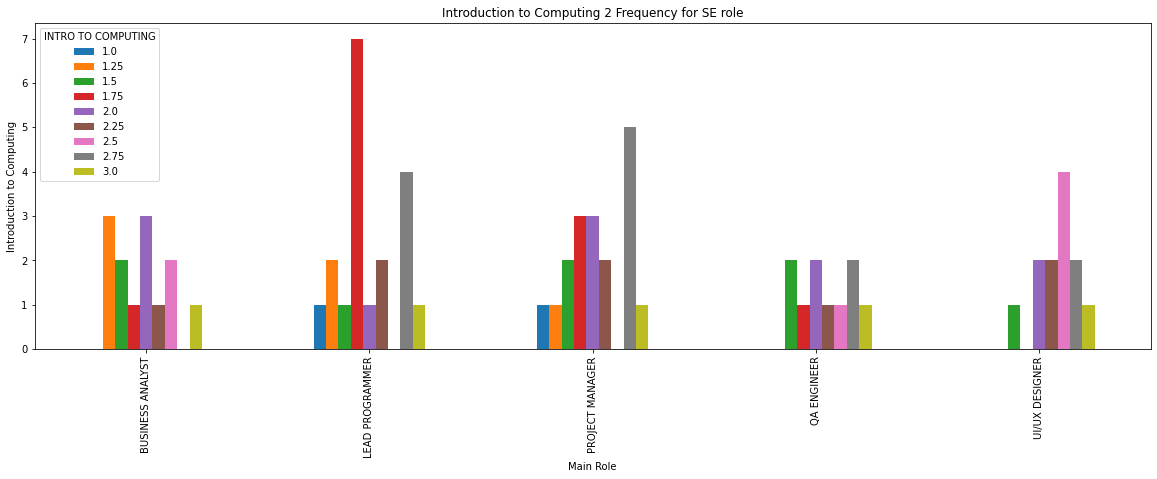

In [19]:
pd.crosstab(df['MAIN ROLE'],df['INTRO TO COMPUTING']).plot(kind="bar",figsize=(20,6))
plt.title('Introduction to Computing 2 Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Introduction to Computing')
plt.show()

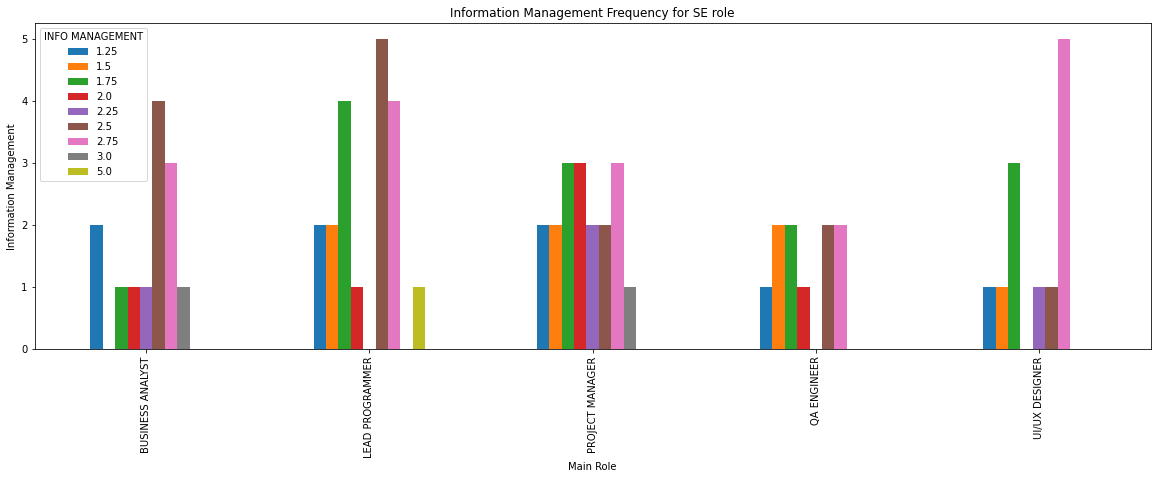

In [20]:
pd.crosstab(df['MAIN ROLE'],df['INFO MANAGEMENT']).plot(kind="bar",figsize=(20,6))
plt.title('Information Management Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Information Management')
plt.show()

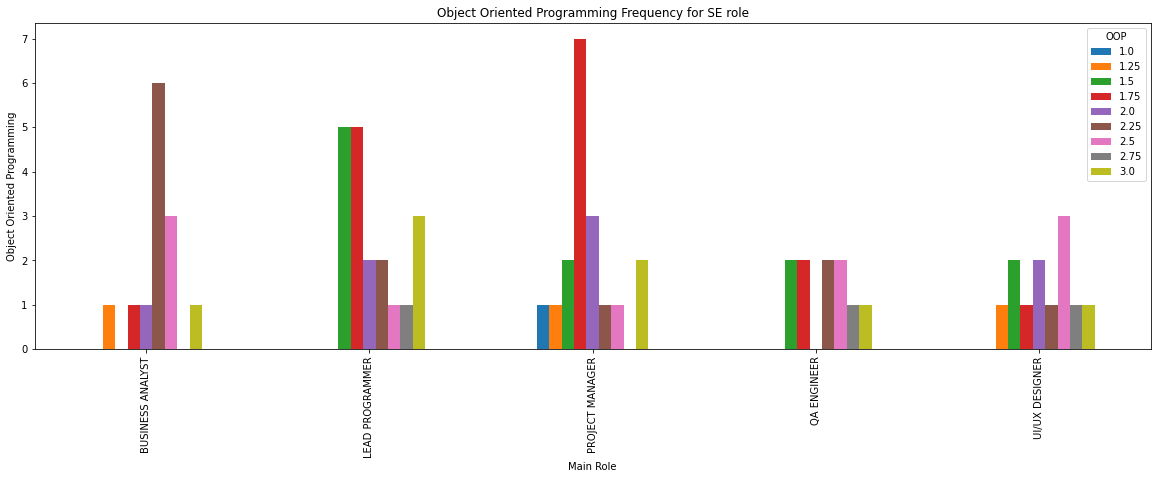

In [21]:
pd.crosstab(df['MAIN ROLE'],df['OOP']).plot(kind="bar",figsize=(20,6))
plt.title('Object Oriented Programming Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Object Oriented Programming')
plt.show()

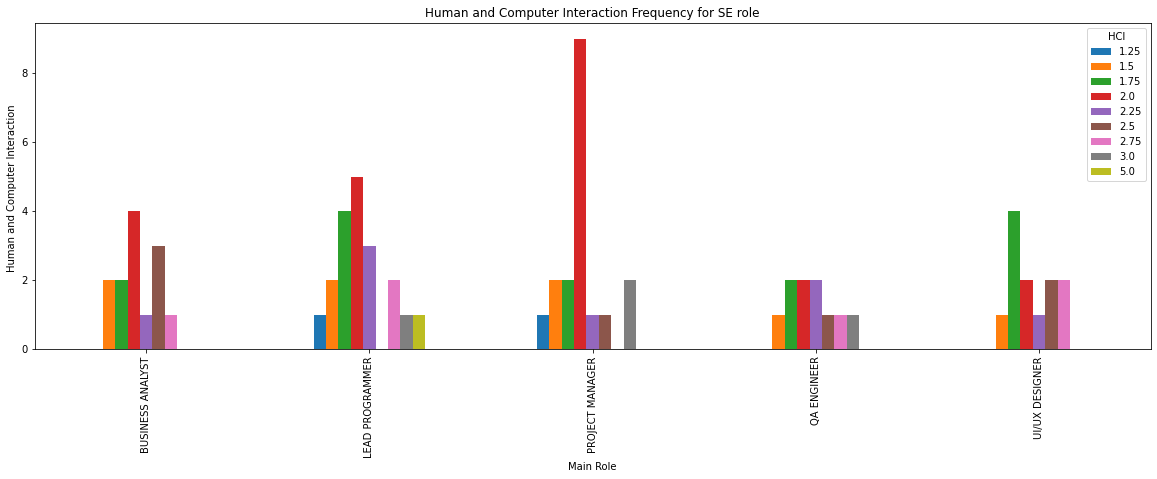

In [22]:
pd.crosstab(df['MAIN ROLE'],df['HCI']).plot(kind="bar",figsize=(20,6))
plt.title('Human and Computer Interaction Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Human and Computer Interaction ')
plt.show()

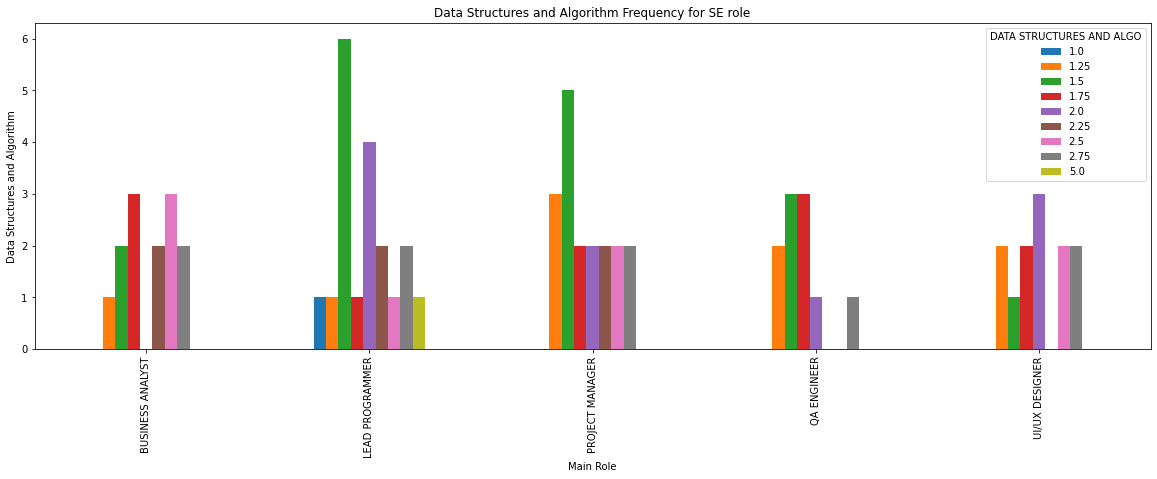

In [23]:
pd.crosstab(df['MAIN ROLE'],df['DATA STRUCTURES AND ALGO']).plot(kind="bar",figsize=(20,6))
plt.title('Data Structures and Algorithm Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Data Structures and Algorithm')
plt.show()

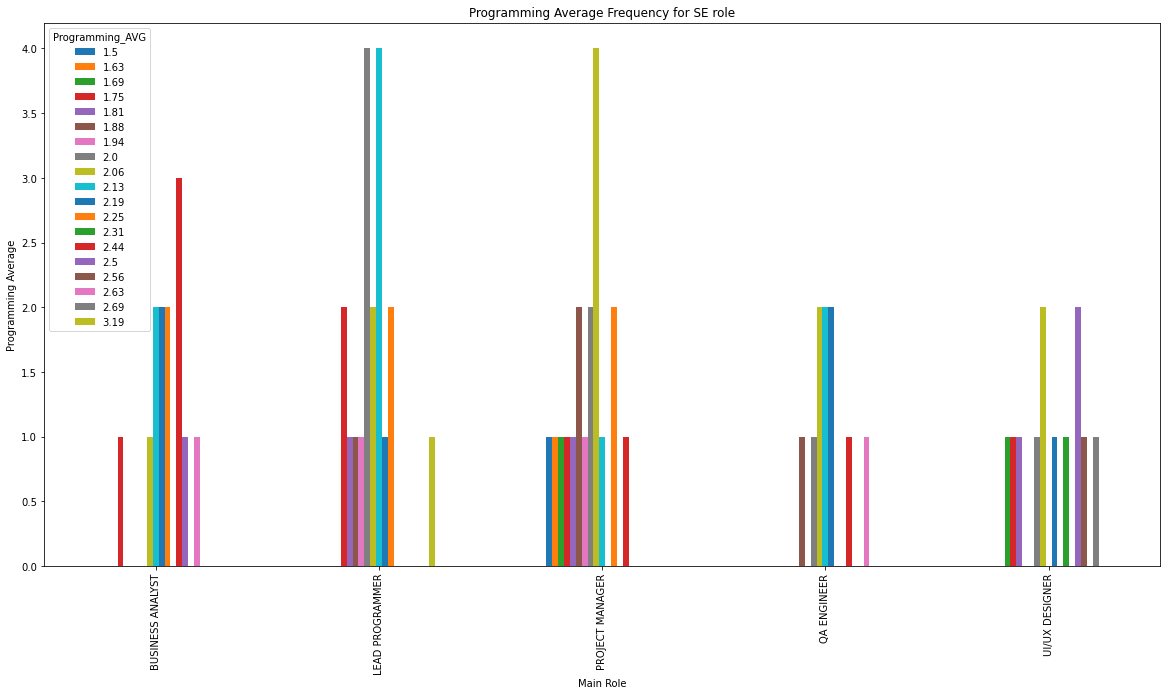

In [24]:
pd.crosstab(df['MAIN ROLE'],df['Programming_AVG']).plot(kind="bar",figsize=(20,10))
plt.title('Programming Average Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Programming Average')
plt.show()

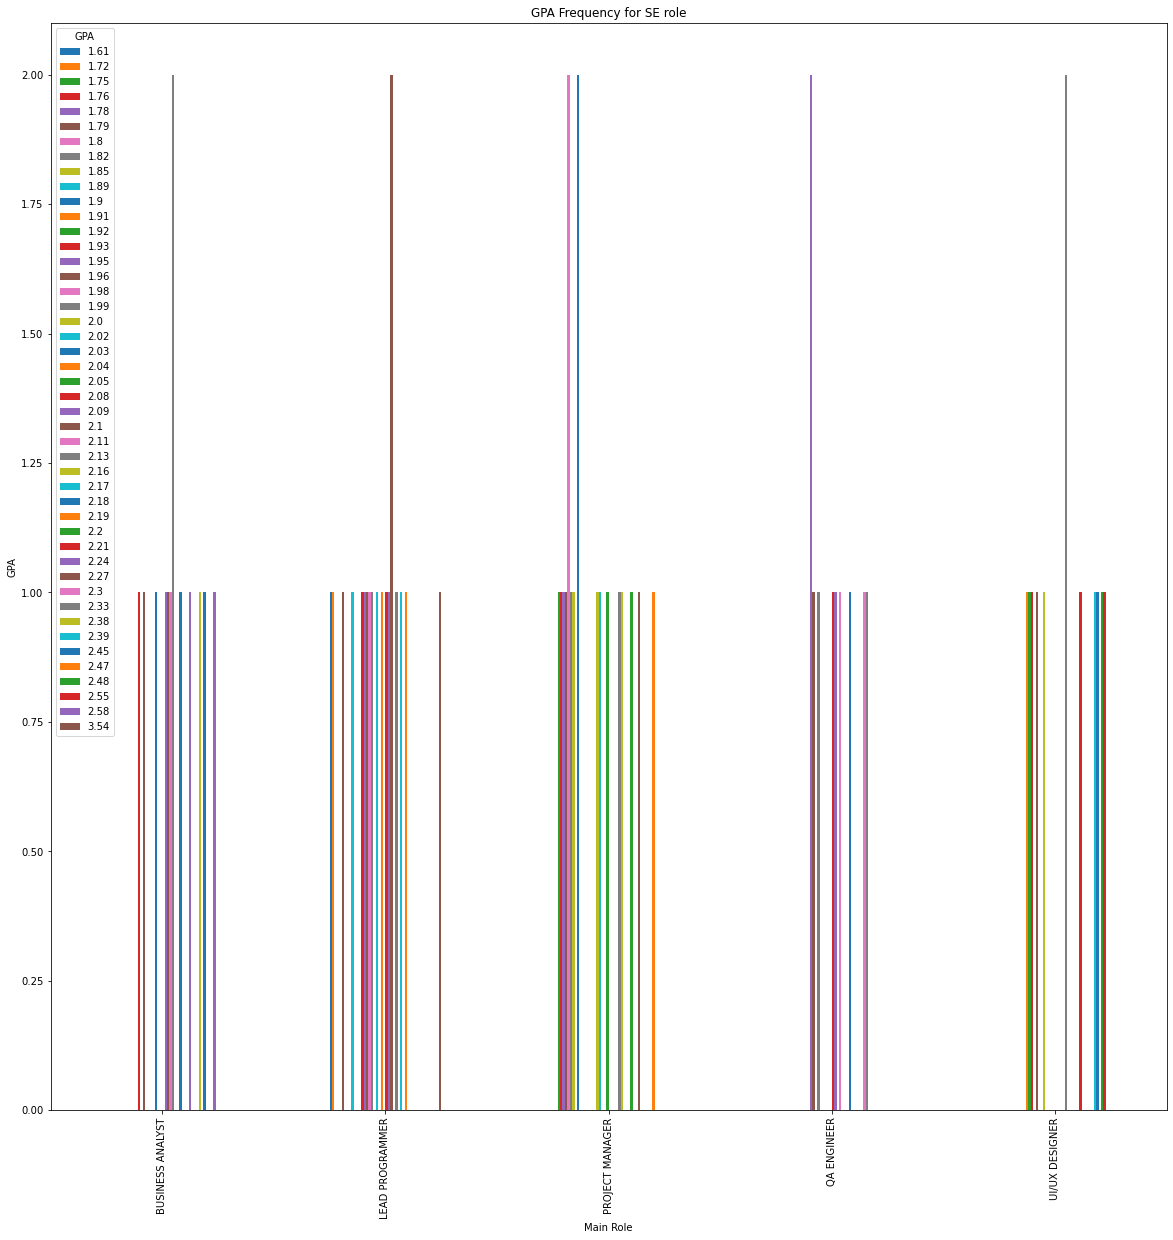

In [25]:
pd.crosstab(df['MAIN ROLE'],df['GPA']).plot(kind="bar",figsize=(20,20))
plt.title('GPA Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('GPA')
plt.show()

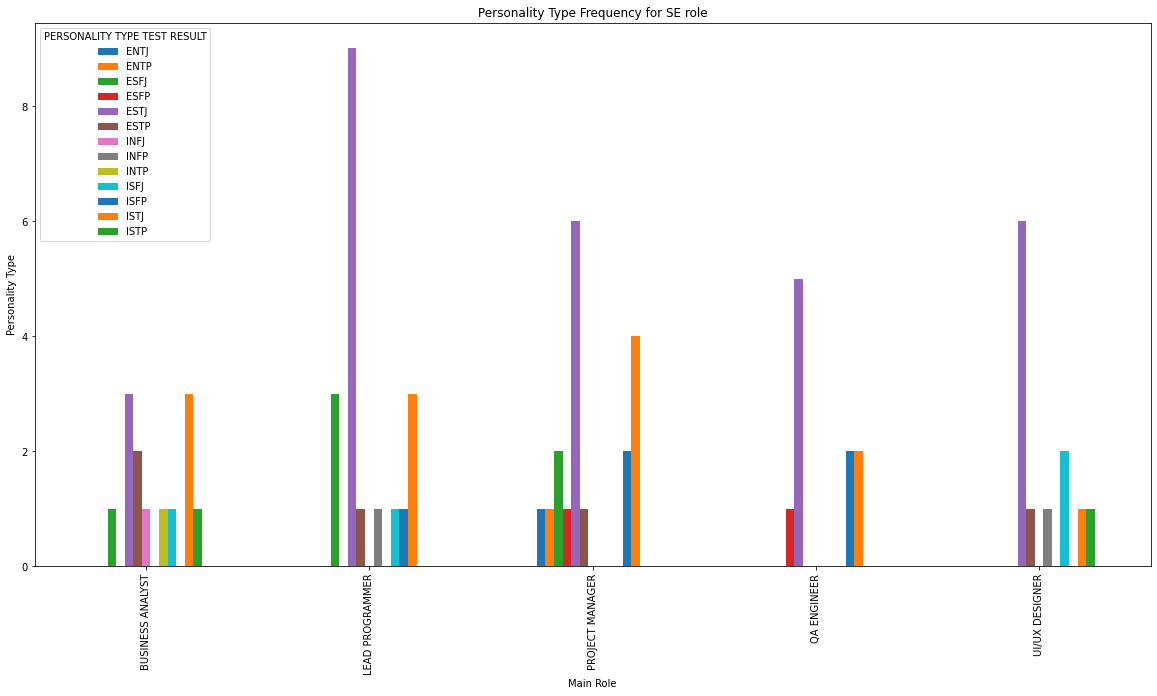

In [26]:
pd.crosstab(df['MAIN ROLE'],df['PERSONALITY TYPE TEST RESULT']).plot(kind="bar",figsize=(20,10))
plt.title('Personality Type Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Personality Type')
plt.show()

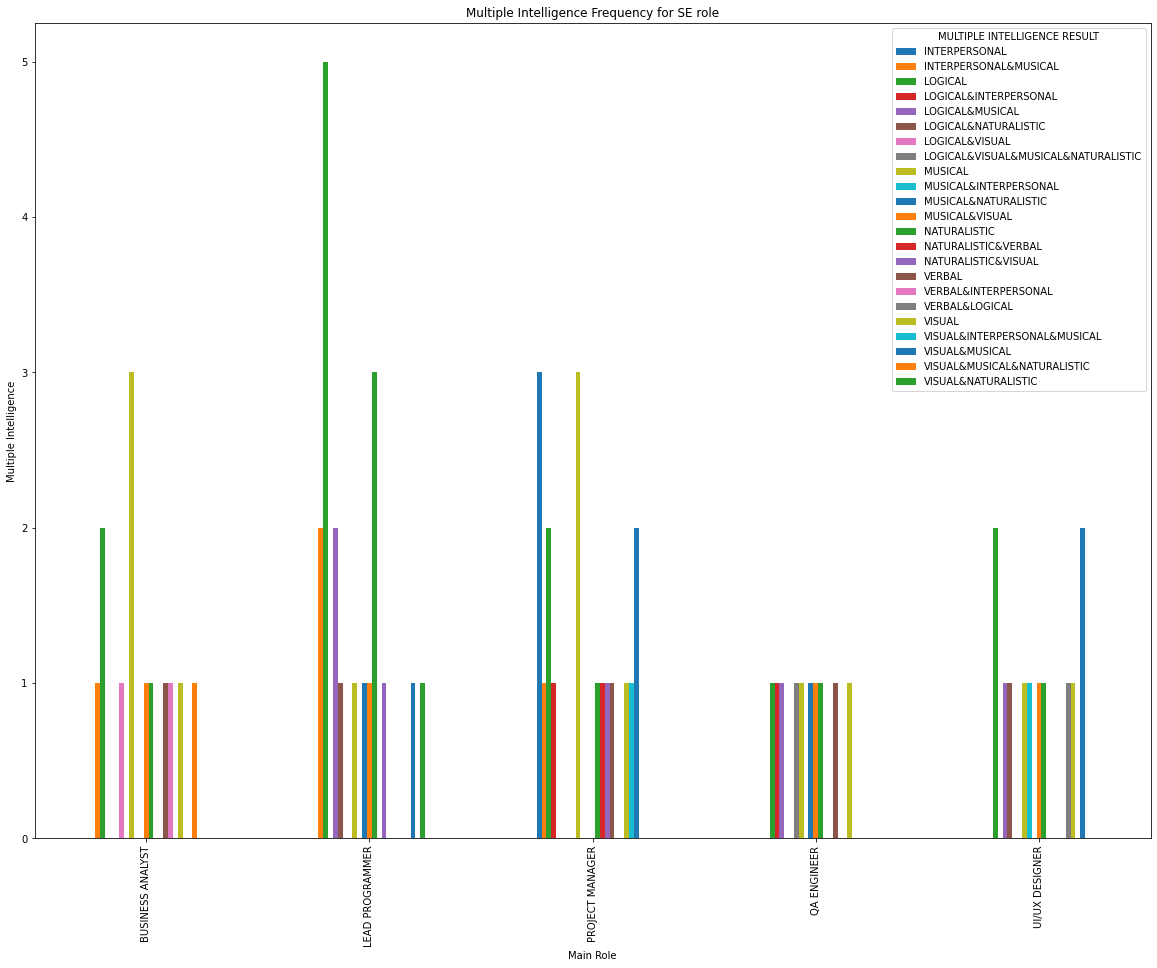

In [27]:
pd.crosstab(df['MAIN ROLE'],df['MULTIPLE INTELLIGENCE RESULT']).plot(kind="bar",figsize=(20,15))
plt.title('Multiple Intelligence Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Multiple Intelligence')
plt.show()

# checking correlation coefficients using pearson method

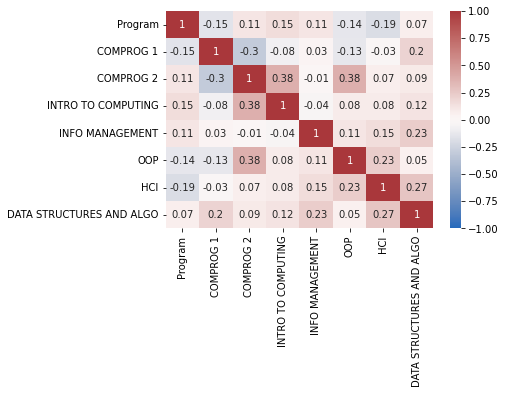

In [28]:
#checking the correlation coefficients of the main features using pearson method


main_variables = df[['Program','COMPROG 1', 'COMPROG 2', 'INTRO TO COMPUTING', 'INFO MANAGEMENT', 'OOP', 'HCI', 'DATA STRUCTURES AND ALGO', 'PERSONALITY TYPE TEST RESULT', 'MULTIPLE INTELLIGENCE RESULT']]
main_variables

matrix_main = main_variables.corr(method = 'pearson', min_periods = 1).round(2)
#mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix_main, annot=True, vmax=1, vmin=-1, cmap='vlag')
plt.show()

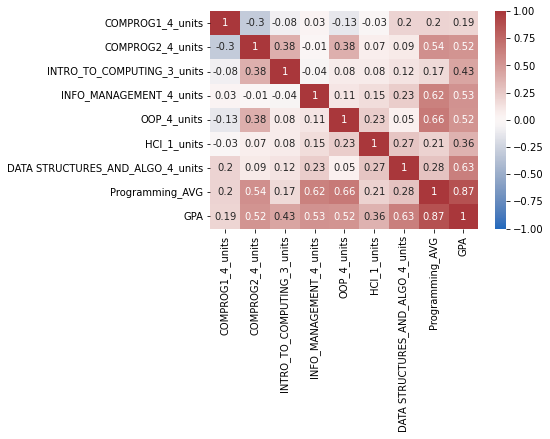

In [29]:
#checking the correlation coefficients of the derived features using pearson method

derived_variables = df[['COMPROG1_4_units','COMPROG2_4_units', 'INTRO_TO_COMPUTING_3_units', 'INFO_MANAGEMENT_4_units', 'OOP_4_units', 'HCI_1_units', 'DATA STRUCTURES_AND_ALGO_4_units', 'Programming_AVG', 'GPA']]
derived_variables

matrix_derived = derived_variables.corr(method = 'pearson', min_periods = 1).round(2)
#mask = np.triu(np.ones_like(matrix_derived, dtype=bool))
sns.heatmap(matrix_derived, annot=True, vmax=1, vmin=-1, cmap='vlag')
plt.show()

In [30]:
df

Program  COMPROG 1  COMPROG 2  INTRO TO COMPUTING  INFO MANAGEMENT   OOP  \
0         0       1.50       1.75                2.00             2.50  1.75   
1         0       1.75       2.00                1.75             2.75  1.75   
2         0       1.50       2.00                1.50             3.00  2.00   
3         0       1.75       2.25                2.25             1.50  2.50   
4         1       2.25       1.75                1.50             2.75  1.75   
..      ...        ...        ...                 ...              ...   ...   
67        1       1.25       3.00                2.00             2.75  2.00   
68        0       2.50       2.00                1.25             2.75  2.50   
69        0       2.00       2.00                1.75             2.50  2.00   
70        0       1.75       2.50                1.25             2.00  2.25   
71        0       2.00       1.50                2.75             3.00  1.75   

     HCI  DATA STRUCTURES AND ALGO  COMPROG1_4_units  COMPROG2_4_units  \
0   1.75                      1.25                 6                 7   
1   1.50                      1.75                 7                 8   
2   2.50                      1.50                 6                 8   
3   3.00                      1.50                 7                 9   
4   2.50                      1.50                 9                 7   
..   ...                       ...               ...               ...   
67  2.00                      2.00                 5                12   
68  2.00                      2.25                10                 8   
69  2.25                      1.50                 8                 8   
70  2.50                      2.50                 7                10   
71  2.00                      1.50                 8                 6   

    INTRO_TO_COMPUTING_3_units  INFO_MANAGEMENT_4_units  OOP_4_units  \
0                         6.00                       10            7   
1                         5.25                       11            7   
2                         4.50                       12            8   
3                         6.75                        6           10   
4                         4.50                       11            7   
..                         ...                      ...          ...   
67                        6.00                       11            8   
68                        3.75                       11           10   
69                        5.25                       10            8   
70                        3.75                        8            9   
71                        8.25                       12            7   

    HCI_1_units  DATA STRUCTURES_AND_ALGO_4_units  Programming_AVG   GPA  \
0          1.75                                 5             1.88  1.78   
1          1.50                                 7             2.06  1.95   
2          2.50                                 6             2.13  1.96   
3          3.00                                 6             2.00  1.99   
4          2.50                                 6             2.13  1.96   
..          ...                               ...              ...   ...   
67         2.00                                 8             2.25  2.17   
68         2.00                                 9             2.44  2.24   
69         2.25                                 6             2.13  1.98   
70         2.50                                10             2.13  2.09   
71         2.00                                 6             2.06  2.05   

   PERSONALITY TYPE TEST RESULT MULTIPLE INTELLIGENCE RESULT         MAIN ROLE  
0                          ESFJ                       VISUAL   PROJECT MANAGER  
1                          INFP                 NATURALISTIC   LEAD PROGRAMMER  
2                          ESTP                      MUSICAL  BUSINESS ANALYST  
3                          ESTP                 NATU

In [31]:
#checking and selecting if there are main features that has no correlation.
matrix_main = matrix_main.unstack()
matrix_main = matrix_main[abs(matrix_main) == 0.0]
print(matrix_main)

Series([], dtype: float64)


In [32]:
#checking and selecting if there are derived features that has no correlation.
matrix_derived = matrix_derived.unstack()
matrix_derived = matrix_derived[abs(matrix_derived) == 0.0]
print(matrix_derived)

Series([], dtype: float64)


# CONVERTING THE CATEGORICAL FEATURES INTO NUMERICAL FEATURES USING ONE HOT ENCODING.

In [33]:
#WE'VE CREATED AN OBJECT TO PASS THE CONVERTED CATEGORICAL DATA USING get_dummies() FUNCTION

In [34]:
new_columns_pt = pd.get_dummies(df['PERSONALITY TYPE TEST RESULT'])
new_columns_pt

ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTP  ISFJ  ISFP  ISTJ  \
0      0     0     1     0     0     0     0     0     0     0     0     0   
1      0     0     0     0     0     0     0     1     0     0     0     0   
2      0     0     0     0     0     1     0     0     0     0     0     0   
3      0     0     0     0     0     1     0     0     0     0     0     0   
4      0     0     0     0     1     0     0     0     0     0     0     0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
67     0     0     0     0     1     0     0     0     0     0     0     0   
68     0     0     1     0     0     0     0     0     0     0     0     0   
69     0     0     0     0     1     0     0     0     0     0     0     0   
70     0     0     0     0     0     0     0     0     0     0     0     1   
71     0     0     0     0     0     1     0     0     0     0     0     0   

    ISTP  
0      0  
1      0  
2      0  
3      0  
4      0  
..   ...  
67     0  
68     0  
69     0  
70     0  
71     0  

[72 rows x 13 columns]

In [35]:
new_columns_mi = df['MULTIPLE INTELLIGENCE RESULT'].str.get_dummies(sep='&')
new_columns_mi

INTERPERSONAL  LOGICAL  MUSICAL  NATURALISTIC  VERBAL  VISUAL
0               0        0        0             0       0       1
1               0        0        0             1       0       0
2               0        0        1             0       0       0
3               0        0        0             1       0       0
4               0        0        1             1       0       0
..            ...      ...      ...           ...     ...     ...
67              0        1        0             0       0       0
68              0        0        1             1       0       1
69              0        0        0             1       0       1
70              0        1        0             0       0       1
71              0        0        0             1       0       0

[72 rows x 6 columns]

In [36]:
#new_columns_pt_valid = df['PT_VALID'].str.get_dummies(sep='&')

#renamed_pt_valid = new_columns_pt_valid.rename(columns={'ENTJ': 'ENTJ_valid', 'INTJ': 'INTJ_valid', 'ISTJ': 'ISTJ_valid' })
#renamed_pt_valid

In [37]:
#new_columns_mi_valid = df['MI_VALID'].str.get_dummies(sep='&')

#renamed_mi_valid = new_columns_mi_valid.rename(columns={'INTERPERSONAL': 'INTERPERSONAL_valid', 'LOGICAL': 'LOGICAL_valid', 'VERBAL': 'VERBAL_valid', 'VISUAL': 'VISUAL_valid'})
#renamed_mi_valid

# Combining the newly created OHD features into the original data frame 

In [38]:
df = df.join(new_columns_pt)

In [39]:
df = df.join(new_columns_mi)

In [40]:
#df = df.join(renamed_pt_valid)

In [41]:
#df = df.join(renamed_mi_valid)

In [42]:
df

Program  COMPROG 1  COMPROG 2  INTRO TO COMPUTING  INFO MANAGEMENT   OOP  \
0         0       1.50       1.75                2.00             2.50  1.75   
1         0       1.75       2.00                1.75             2.75  1.75   
2         0       1.50       2.00                1.50             3.00  2.00   
3         0       1.75       2.25                2.25             1.50  2.50   
4         1       2.25       1.75                1.50             2.75  1.75   
..      ...        ...        ...                 ...              ...   ...   
67        1       1.25       3.00                2.00             2.75  2.00   
68        0       2.50       2.00                1.25             2.75  2.50   
69        0       2.00       2.00                1.75             2.50  2.00   
70        0       1.75       2.50                1.25             2.00  2.25   
71        0       2.00       1.50                2.75             3.00  1.75   

     HCI  DATA STRUCTURES AND ALGO  COMPROG1_4_units  COMPROG2_4_units  ...  \
0   1.75                      1.25                 6                 7  ...   
1   1.50                      1.75                 7                 8  ...   
2   2.50                      1.50                 6                 8  ...   
3   3.00                      1.50                 7                 9  ...   
4   2.50                      1.50                 9                 7  ...   
..   ...                       ...               ...               ...  ...   
67  2.00                      2.00                 5                12  ...   
68  2.00                      2.25                10                 8  ...   
69  2.25                      1.50                 8                 8  ...   
70  2.50                      2.50                 7                10  ...   
71  2.00                      1.50                 8                 6  ...   

    ISFJ  ISFP  ISTJ  ISTP  INTERPERSONAL  LOGICAL  MUSICAL NATURALISTIC  \
0      0     0     0     0              0        0        0            0   
1      0     0     0     0              0        0        0            1   
2      0     0     0     0              0        0        1            0   
3      0     0     0     0              0        0        0            1   
4      0     0     0     0              0        0        1            1   
..   ...   ...   ...   ...            ...      ...      ...          ...   
67     0     0     0     0              0        1        0            0   
68     0     0     0     0              0        0        1            1   
69     0     0     0     0              0        0        0            1   
70     0     0     1     0              0        1        0            0   
71     0     0     0     0              0        0        0            1   

   VERBAL VISUAL  
0       0      1  
1       0      0  
2       0      0  
3       0      0  
4       0      0  
..    ...    ...  
67      0      0  
68      0      1  
69      0      1  
70      0      1  
71      0      0  

[72 rows x 39 columns]

# Converting the categorical values of the column main role into numerical values using dummy encoding.

0 = LEAD PROGRAMMER,
1 = PROJECT MANAGER,
2 = UI/UX DESIGNER,
3 = QA ENGINEER,
4 = BUSINESS ANALYST,


In [43]:
dict_target = {'LEAD PROGRAMMER':0, 'PROJECT MANAGER':1, 'UI/UX DESIGNER':2, 'QA ENGINEER':3, 'BUSINESS ANALYST':4}
df['MAIN_ROLE_CATEGORICAL'] = df['MAIN ROLE'].map(dict_target)


# Dropping the categorical features of the dataframe

In [44]:
df.drop(columns = ['PERSONALITY TYPE TEST RESULT', 'MULTIPLE INTELLIGENCE RESULT', 'MAIN ROLE'], inplace=True)

In [45]:
df.isnull().sum()

Program                             0
COMPROG 1                           0
COMPROG 2                           0
INTRO TO COMPUTING                  0
INFO MANAGEMENT                     0
OOP                                 0
HCI                                 0
DATA STRUCTURES AND ALGO            0
COMPROG1_4_units                    0
COMPROG2_4_units                    0
INTRO_TO_COMPUTING_3_units          0
INFO_MANAGEMENT_4_units             0
OOP_4_units                         0
HCI_1_units                         0
DATA STRUCTURES_AND_ALGO_4_units    0
Programming_AVG                     0
GPA                                 0
ENTJ                                0
ENTP                                0
ESFJ                                0
ESFP                                0
ESTJ                                0
ESTP                                0
INFJ                                0
INFP                                0
INTP                                0
ISFJ        

In [46]:
df.tail(5)

Program  COMPROG 1  COMPROG 2  INTRO TO COMPUTING  INFO MANAGEMENT   OOP  \
67        1       1.25        3.0                2.00             2.75  2.00   
68        0       2.50        2.0                1.25             2.75  2.50   
69        0       2.00        2.0                1.75             2.50  2.00   
70        0       1.75        2.5                1.25             2.00  2.25   
71        0       2.00        1.5                2.75             3.00  1.75   

     HCI  DATA STRUCTURES AND ALGO  COMPROG1_4_units  COMPROG2_4_units  ...  \
67  2.00                      2.00                 5                12  ...   
68  2.00                      2.25                10                 8  ...   
69  2.25                      1.50                 8                 8  ...   
70  2.50                      2.50                 7                10  ...   
71  2.00                      1.50                 8                 6  ...   

    ISFP  ISTJ  ISTP  INTERPERSONAL  LOGICAL  MUSICAL  NATURALISTIC  VERBAL  \
67     0     0     0              0        1        0             0       0   
68     0     0     0              0        0        1             1       0   
69     0     0     0              0        0        0             1       0   
70     0     1     0              0        1        0             0       0   
71     0     0     0              0        0        0             1       0   

    VISUAL  MAIN_ROLE_CATEGORICAL  
67       0                      0  
68       1                      4  
69       1                      0  
70       1                      4  
71       0                      1  

[5 rows x 37 columns]

In [47]:
df.columns

Index(['Program', 'COMPROG 1', 'COMPROG 2', 'INTRO TO COMPUTING',
       'INFO MANAGEMENT', 'OOP', 'HCI', 'DATA STRUCTURES AND ALGO',
       'COMPROG1_4_units', 'COMPROG2_4_units', 'INTRO_TO_COMPUTING_3_units',
       'INFO_MANAGEMENT_4_units', 'OOP_4_units', 'HCI_1_units',
       'DATA STRUCTURES_AND_ALGO_4_units', 'Programming_AVG', 'GPA', 'ENTJ',
       'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTP', 'ISFJ',
       'ISFP', 'ISTJ', 'ISTP', 'INTERPERSONAL', 'LOGICAL', 'MUSICAL',
       'NATURALISTIC', 'VERBAL', 'VISUAL', 'MAIN_ROLE_CATEGORICAL'],
      dtype='object')

In [48]:
#return the number of duplicates
df.filter(like='LOGIC')

LOGICAL
0         0
1         0
2         0
3         0
4         0
..      ...
67        1
68        0
69        0
70        1
71        0

[72 rows x 1 columns]

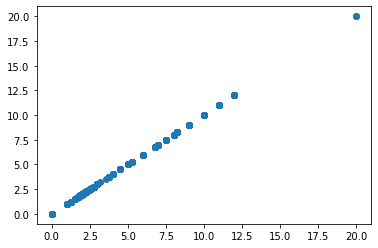

In [49]:
#PLOT THE WHOLE DATA SET USING SCATTER PLOT
plt.scatter(df, df)

# Storing the features and output values to variables.

In [50]:
features=df.columns[:-1].values
features

array(['Program', 'COMPROG 1', 'COMPROG 2', 'INTRO TO COMPUTING',
       'INFO MANAGEMENT', 'OOP', 'HCI', 'DATA STRUCTURES AND ALGO',
       'COMPROG1_4_units', 'COMPROG2_4_units',
       'INTRO_TO_COMPUTING_3_units', 'INFO_MANAGEMENT_4_units',
       'OOP_4_units', 'HCI_1_units', 'DATA STRUCTURES_AND_ALGO_4_units',
       'Programming_AVG', 'GPA', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',
       'ESTP', 'INFJ', 'INFP', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP',
       'INTERPERSONAL', 'LOGICAL', 'MUSICAL', 'NATURALISTIC', 'VERBAL',
       'VISUAL'], dtype=object)

In [51]:
target=df.columns[-1:]
target

Index(['MAIN_ROLE_CATEGORICAL'], dtype='object')

# Calucate the skewness of dataset

0.3431652559456073


C:\Users\drene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


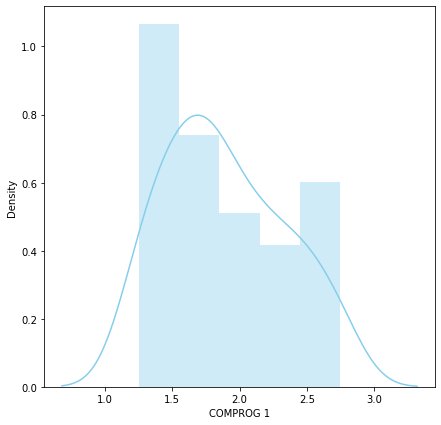

In [93]:
#Skewness of main variables in the dataset
from scipy.stats import skew

f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.distplot( df['COMPROG 1'] , color="skyblue")

print(skew(df['COMPROG 1'], axis=0, bias=False))



C:\Users\drene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.03777736285276455


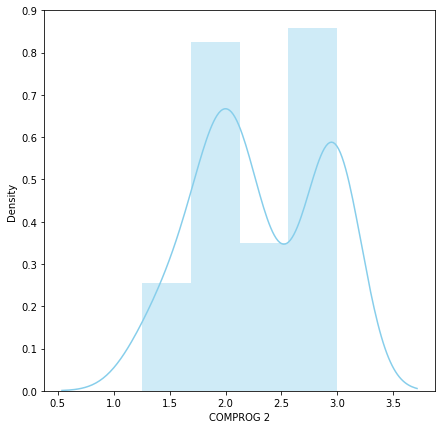

In [84]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.distplot( df['COMPROG 2'] , color="skyblue")

print(skew(df['COMPROG 2'], axis=0, bias=False))

-0.041553084643413125


C:\Users\drene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


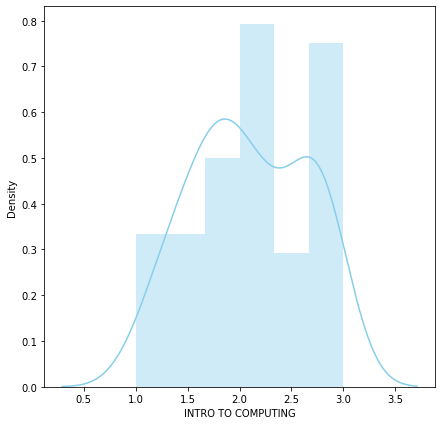

In [95]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.distplot( df['INTRO TO COMPUTING'] , color="skyblue")

print(skew(df['INTRO TO COMPUTING'], axis=0, bias=False))

C:\Users\drene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9633726605368398


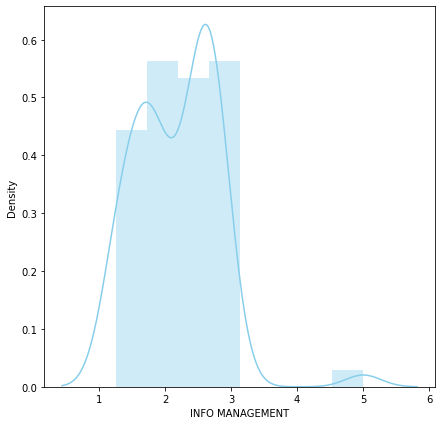

In [96]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.distplot( df['INFO MANAGEMENT'] , color="skyblue")

print(skew(df['INFO MANAGEMENT'], axis=0, bias=False))

0.25589633092055036


C:\Users\drene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


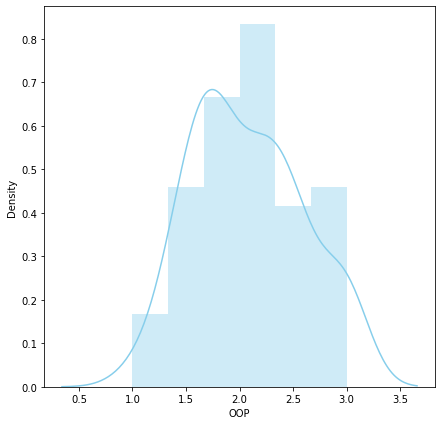

In [97]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.distplot( df['OOP'] , color="skyblue")

print(skew(df['OOP'], axis=0, bias=False))

2.1487716439828395


C:\Users\drene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


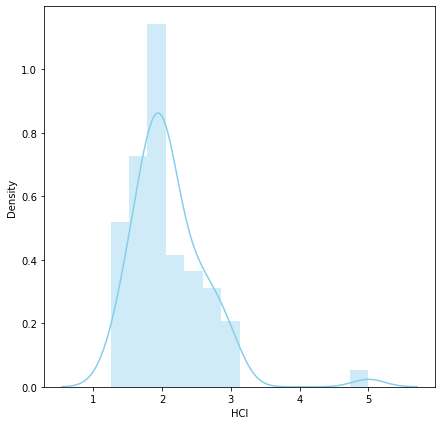

In [98]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.distplot( df['HCI'] , color="skyblue")

print(skew(df['HCI'], axis=0, bias=False))

C:\Users\drene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.7715387628247112


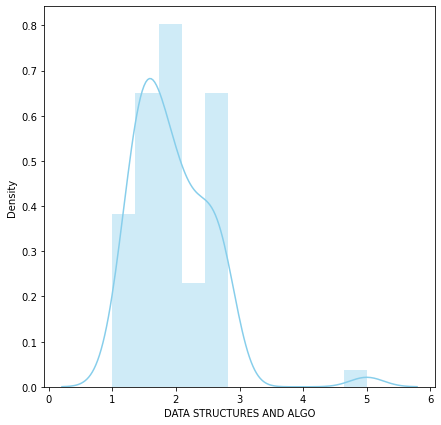

In [99]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.distplot( df['DATA STRUCTURES AND ALGO'] , color="skyblue")

print(skew(df['DATA STRUCTURES AND ALGO'], axis=0, bias=False))

0.3431652559456073


C:\Users\drene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


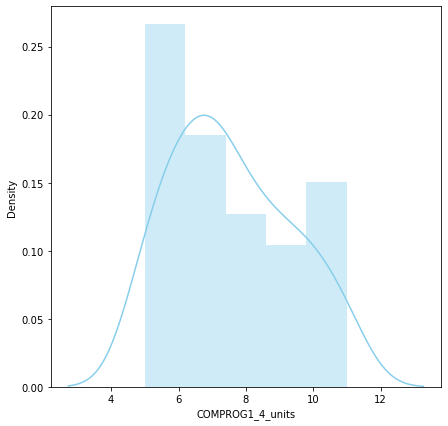

In [102]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.distplot( df['COMPROG1_4_units'] , color="skyblue")

print(skew(df['COMPROG1_4_units'], axis=0, bias=False))

-0.03777736285276455


C:\Users\drene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


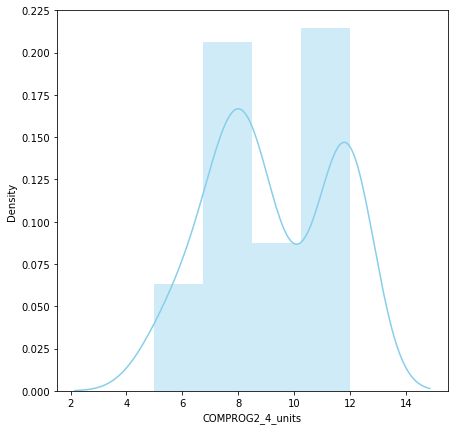

In [103]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.distplot( df['COMPROG2_4_units'] , color="skyblue")

print(skew(df['COMPROG2_4_units'], axis=0, bias=False))

In [101]:
df.columns

Index(['Program', 'COMPROG 1', 'COMPROG 2', 'INTRO TO COMPUTING',
       'INFO MANAGEMENT', 'OOP', 'HCI', 'DATA STRUCTURES AND ALGO',
       'COMPROG1_4_units', 'COMPROG2_4_units', 'INTRO_TO_COMPUTING_3_units',
       'INFO_MANAGEMENT_4_units', 'OOP_4_units', 'HCI_1_units',
       'DATA STRUCTURES_AND_ALGO_4_units', 'Programming_AVG', 'GPA', 'ENTJ',
       'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTP', 'ISFJ',
       'ISFP', 'ISTJ', 'ISTP', 'INTERPERSONAL', 'LOGICAL', 'MUSICAL',
       'NATURALISTIC', 'VERBAL', 'VISUAL', 'MAIN_ROLE_CATEGORICAL'],
      dtype='object')

# Checking correlation between the features and the target variable using pearson method

In [54]:
main_variables.corrwith(df["MAIN_ROLE_CATEGORICAL"], method = 'pearson').round(2)

Program                    -0.11
COMPROG 1                   0.35
COMPROG 2                   0.13
INTRO TO COMPUTING          0.00
INFO MANAGEMENT            -0.00
OOP                         0.17
HCI                        -0.03
DATA STRUCTURES AND ALGO   -0.01
dtype: float64

In [55]:
derived_variables.corrwith(df["MAIN_ROLE_CATEGORICAL"], method = 'pearson').round(2)

COMPROG1_4_units                    0.35
COMPROG2_4_units                    0.13
INTRO_TO_COMPUTING_3_units          0.00
INFO_MANAGEMENT_4_units            -0.00
OOP_4_units                         0.17
HCI_1_units                        -0.03
DATA STRUCTURES_AND_ALGO_4_units   -0.01
Programming_AVG                     0.28
GPA                                 0.19
dtype: float64

<AxesSubplot:>

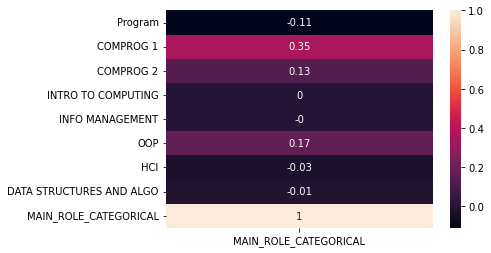

In [76]:
#visualize the main variables-target relationship
target_locate = df["MAIN_ROLE_CATEGORICAL"]

temp_df = main_variables
temp_df = pd.concat([temp_df, target_locate], axis=1)

corr = temp_df.corr(method= 'pearson')[['MAIN_ROLE_CATEGORICAL']].round(2)
sns.heatmap(corr, annot=True)

<AxesSubplot:>

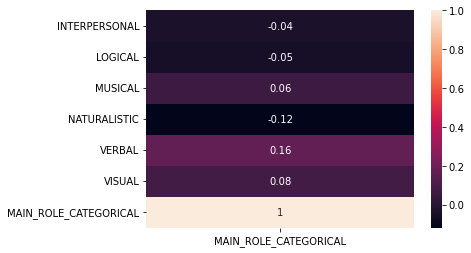

In [78]:
#visualize the main variables(Multiple Intelligences)-target relationship
target_locate = df["MAIN_ROLE_CATEGORICAL"]

temp_df = new_columns_mi
temp_df = pd.concat([temp_df, target_locate], axis=1)

corr = temp_df.corr(method= 'pearson')[['MAIN_ROLE_CATEGORICAL']].round(2)
sns.heatmap(corr, annot=True)


<AxesSubplot:>

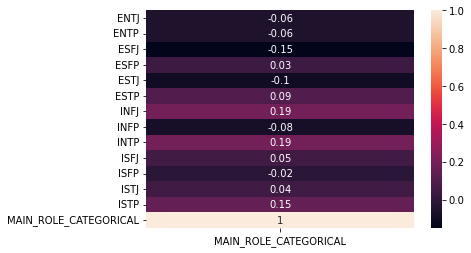

In [79]:
#visualize the main variables(Personality Types)-target relationship
target_locate = df["MAIN_ROLE_CATEGORICAL"]

temp_df = new_columns_pt
temp_df = pd.concat([temp_df, target_locate], axis=1)

corr = temp_df.corr(method= 'pearson')[['MAIN_ROLE_CATEGORICAL']].round(2)
sns.heatmap(corr, annot=True)


<AxesSubplot:>

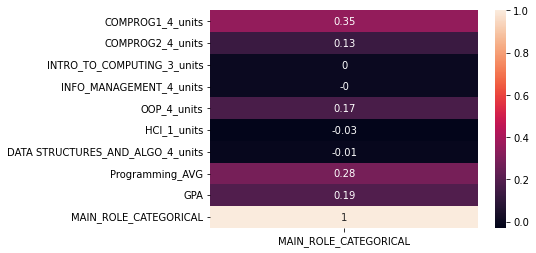

In [57]:
#visualize the derived variables-target relationship
target_locate = df["MAIN_ROLE_CATEGORICAL"]

temp_df = derived_variables
temp_df = pd.concat([temp_df, target_locate], axis=1)

corr = temp_df.corr(method= 'pearson')[['MAIN_ROLE_CATEGORICAL']].round(2)
sns.heatmap(corr, annot=True)

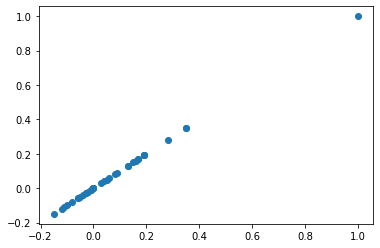

In [58]:
#PLOT THE CORRELATION OF FEATURES VS TARGET VARIABLE USING SCATTER PLOT
featuresVStarget = df.corrwith(df["MAIN_ROLE_CATEGORICAL"], method = 'pearson').round(2)

plt.scatter(featuresVStarget, featuresVStarget)

# Splitting the dataset using train_test_split with 20% records for testing and 80% records for training of the dataset.

In [59]:
#split and test

from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2, random_state=5)
test.head(5)

Program  COMPROG 1  COMPROG 2  INTRO TO COMPUTING  INFO MANAGEMENT   OOP  \
38        0       2.50       2.00                2.00             1.25  1.25   
23        0       2.50       2.25                1.75             2.50  2.50   
69        0       2.00       2.00                1.75             2.50  2.00   
10        1       2.25       2.00                2.00             2.50  2.50   
51        1       1.50       3.00                2.00             1.25  3.00   

     HCI  DATA STRUCTURES AND ALGO  COMPROG1_4_units  COMPROG2_4_units  ...  \
38  2.25                      2.50                10                 8  ...   
23  1.75                      1.25                10                 9  ...   
69  2.25                      1.50                 8                 8  ...   
10  2.00                      1.50                 9                 8  ...   
51  2.75                      1.75                 6                12  ...   

    ISFP  ISTJ  ISTP  INTERPERSONAL  LOGICAL  MUSICAL  NATURALISTIC  VERBAL  \
38     0     0     0              1        0        1             0       0   
23     0     0     0              0        0        0             1       0   
69     0     0     0              0        0        0             1       0   
10     0     0     0              0        0        0             1       0   
51     0     1     0              0        0        1             0       0   

    VISUAL  MAIN_ROLE_CATEGORICAL  
38       0                      4  
23       0                      4  
69       1                      0  
10       0                      2  
51       1                      4  

[5 rows x 37 columns]

# Spot Check Algorithms and Show evaluation metrics (k-fold cross validation, accuracy, and confusion matrix)

In [60]:
#spot check algorithm using accuracy

# Algorithms
#Logistic Regression, Decision Tree, Naive bayes
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from numpy import mean
from numpy import std
import numpy as np
import math

In [61]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

#define the models to be used
models = dict()
models['dtc'] = DecisionTreeClassifier()
models['lr'] = LogisticRegression()
models['nb'] = GaussianNB()

dtc = DecisionTreeClassifier()
log_reg = LogisticRegression()
naive = GaussianNB()

#check model performance using cross validation
for name, model in models.items():
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(model, X_train, Y_train, cv = cv, n_jobs = 1, error_score = 'raise')
    print(name, '\n5-Fold Validation Scores:\n', scores)
    print('Cross Validation Training Accuracy: %.3f (%.3f)\n' % (mean(scores), std(scores)))


dtc 
5-Fold Validation Scores:
 [0.16666667 0.33333333 0.18181818 0.36363636 0.09090909]
Cross Validation Training Accuracy: 0.227 (0.104)



C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

lr 
5-Fold Validation Scores:
 [0.16666667 0.16666667 0.18181818 0.27272727 0.27272727]
Cross Validation Training Accuracy: 0.212 (0.050)

nb 
5-Fold Validation Scores:
 [0.16666667 0.25       0.09090909 0.18181818 0.09090909]
Cross Validation Training Accuracy: 0.156 (0.060)



C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

# Training the models


Algorithm:  dtc
Confusion Matrix:
 [[0 0 2 0 0]
 [0 4 1 0 0]
 [1 0 0 1 0]
 [1 0 0 0 0]
 [0 1 2 2 0]]
Accuracy:  0.26666666666666666
Precision:  0.26666666666666666
Recall Score:  0.26666666666666666
F1 Score:  0.26666666666666666


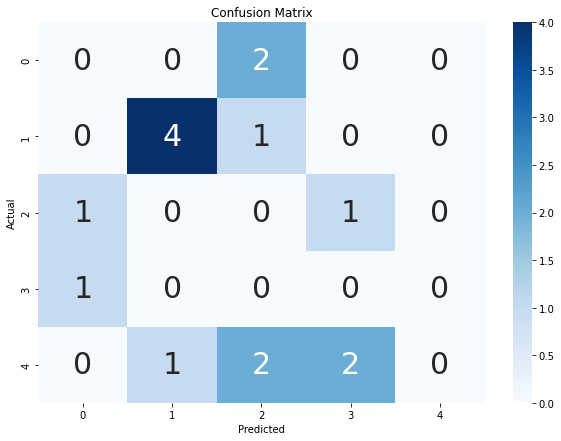

C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Algorithm:  lr
Confusion Matrix:
 [[1 0 1 0 0]
 [3 1 1 0 0]
 [0 0 0 2 0]
 [1 0 0 0 0]
 [1 1 1 1 1]]
Accuracy:  0.2
Precision:  0.2
Recall Score:  0.2
F1 Score:  0.20000000000000004


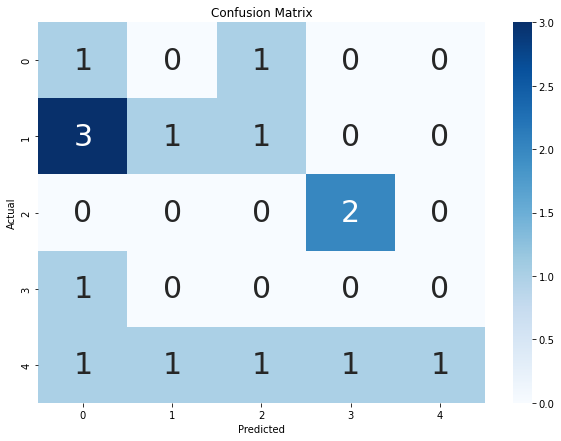

C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



Algorithm:  nb
Confusion Matrix:
 [[0 0 0 2 0]
 [0 0 0 5 0]
 [0 0 1 1 0]
 [0 1 0 0 0]
 [1 0 2 2 0]]
Accuracy:  0.06666666666666667
Precision:  0.06666666666666667
Recall Score:  0.06666666666666667
F1 Score:  0.06666666666666667


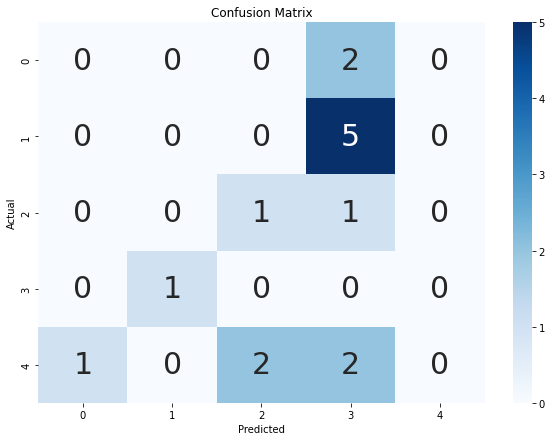

In [62]:
results = dict()
for name, model in models.items():
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    print('\nAlgorithm: ', name)
    res_cm = confusion_matrix(Y_test, predicted)
    print('Confusion Matrix:\n', res_cm)
    res_acc = accuracy_score(Y_test, predicted)
    print('Accuracy: ', res_acc)
    res_pres = precision_score(Y_test, predicted, average='micro')
    print('Precision: ', res_pres)
    res_recall = recall_score(Y_test, predicted, average='micro')
    print('Recall Score: ', res_recall)
    res_f1 = f1_score(Y_test, predicted, average='micro')
    print('F1 Score: ', res_f1)
    
    results[name]=res_acc
    
    plt.figure(figsize = (10,7))
    cm_heatmap = sns.heatmap(res_cm, annot=True, annot_kws={"size": 30},cmap='Blues')
    cm_heatmap.set(title='Confusion Matrix')
    cm_heatmap.set(xlabel='Predicted', ylabel='Actual')
    plt.show()
    

In [63]:
#df_filtered = matrix.to_frame()
#df_filtered.unstack()

In [64]:
df.columns

Index(['Program', 'COMPROG 1', 'COMPROG 2', 'INTRO TO COMPUTING',
       'INFO MANAGEMENT', 'OOP', 'HCI', 'DATA STRUCTURES AND ALGO',
       'COMPROG1_4_units', 'COMPROG2_4_units', 'INTRO_TO_COMPUTING_3_units',
       'INFO_MANAGEMENT_4_units', 'OOP_4_units', 'HCI_1_units',
       'DATA STRUCTURES_AND_ALGO_4_units', 'Programming_AVG', 'GPA', 'ENTJ',
       'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTP', 'ISFJ',
       'ISFP', 'ISTJ', 'ISTP', 'INTERPERSONAL', 'LOGICAL', 'MUSICAL',
       'NATURALISTIC', 'VERBAL', 'VISUAL', 'MAIN_ROLE_CATEGORICAL'],
      dtype='object')

In [65]:
df.isnull().sum()

Program                             0
COMPROG 1                           0
COMPROG 2                           0
INTRO TO COMPUTING                  0
INFO MANAGEMENT                     0
OOP                                 0
HCI                                 0
DATA STRUCTURES AND ALGO            0
COMPROG1_4_units                    0
COMPROG2_4_units                    0
INTRO_TO_COMPUTING_3_units          0
INFO_MANAGEMENT_4_units             0
OOP_4_units                         0
HCI_1_units                         0
DATA STRUCTURES_AND_ALGO_4_units    0
Programming_AVG                     0
GPA                                 0
ENTJ                                0
ENTP                                0
ESFJ                                0
ESFP                                0
ESTJ                                0
ESTP                                0
INFJ                                0
INFP                                0
INTP                                0
ISFJ        

In [66]:
#checking the result of the models based on the confusion matrix
print(results)

{'dtc': 0.26666666666666666, 'lr': 0.2, 'nb': 0.06666666666666667}


In [67]:
#exporting the cleaned data set
#df_filtered_data_set = df
#df_filtered_data_set.to_csv('MAIN-ROLE-CLEANED-DATASET.csv')

In [68]:
df

Program  COMPROG 1  COMPROG 2  INTRO TO COMPUTING  INFO MANAGEMENT   OOP  \
0         0       1.50       1.75                2.00             2.50  1.75   
1         0       1.75       2.00                1.75             2.75  1.75   
2         0       1.50       2.00                1.50             3.00  2.00   
3         0       1.75       2.25                2.25             1.50  2.50   
4         1       2.25       1.75                1.50             2.75  1.75   
..      ...        ...        ...                 ...              ...   ...   
67        1       1.25       3.00                2.00             2.75  2.00   
68        0       2.50       2.00                1.25             2.75  2.50   
69        0       2.00       2.00                1.75             2.50  2.00   
70        0       1.75       2.50                1.25             2.00  2.25   
71        0       2.00       1.50                2.75             3.00  1.75   

     HCI  DATA STRUCTURES AND ALGO  COMPROG1_4_units  COMPROG2_4_units  ...  \
0   1.75                      1.25                 6                 7  ...   
1   1.50                      1.75                 7                 8  ...   
2   2.50                      1.50                 6                 8  ...   
3   3.00                      1.50                 7                 9  ...   
4   2.50                      1.50                 9                 7  ...   
..   ...                       ...               ...               ...  ...   
67  2.00                      2.00                 5                12  ...   
68  2.00                      2.25                10                 8  ...   
69  2.25                      1.50                 8                 8  ...   
70  2.50                      2.50                 7                10  ...   
71  2.00                      1.50                 8                 6  ...   

    ISFP  ISTJ  ISTP  INTERPERSONAL  LOGICAL  MUSICAL  NATURALISTIC  VERBAL  \
0      0     0     0              0        0        0             0       0   
1      0     0     0              0        0        0             1       0   
2      0     0     0              0        0        1             0       0   
3      0     0     0              0        0        0             1       0   
4      0     0     0              0        0        1             1       0   
..   ...   ...   ...            ...      ...      ...           ...     ...   
67     0     0     0              0        1        0             0       0   
68     0     0     0              0        0        1             1       0   
69     0     0     0              0        0        0             1       0   
70     0     1     0              0        1        0             0       0   
71     0     0     0              0        0        0             1       0   

    VISUAL  MAIN_ROLE_CATEGORICAL  
0        1                      1  
1        0                      0  
2        0                      4  
3        0                      0  
4        0                      3  
..     ...                    ...  
67       0                      0  
68       1                      4  
69       1                      0  
70       1                      4  
71       0                      1  

[72 rows x 37 columns]

# Selecting and Deploying the best model according to the evaluation metrics (k-fold validation, accuracy, and confusion matrix)

In [69]:
import pickle
pickle.dump(models['lr'], open('main_final_model.pkl', 'wb'))

# Batch Predictions

In [70]:
test_model = pickle.load(open('main_final_model.pkl', 'rb'))

In [71]:
new_Xdata = X_test.sample(10)
new_Ydata = Y_test['MAIN_ROLE_CATEGORICAL'].loc[new_Xdata.index.values]
print(new_Xdata)

    Program  COMPROG 1  COMPROG 2  INTRO TO COMPUTING  INFO MANAGEMENT   OOP  \
25        1       2.00       3.00                2.25             1.25  1.75   
26        1       2.00       1.50                1.75             1.50  1.00   
23        0       2.50       2.25                1.75             2.50  2.50   
38        0       2.50       2.00                2.00             1.25  1.25   
69        0       2.00       2.00                1.75             2.50  2.00   
43        0       1.50       2.75                1.50             2.00  1.75   
51        1       1.50       3.00                2.00             1.25  3.00   
64        0       2.75       3.00                2.50             2.50  2.25   
10        1       2.25       2.00                2.00             2.50  2.50   
40        1       1.75       1.75                2.25             1.75  1.25   

     HCI  DATA STRUCTURES AND ALGO  COMPROG1_4_units  COMPROG2_4_units  ...  \
25  2.25                      1.25      

In [72]:
print(new_Ydata)

25    2
26    1
23    4
38    4
69    0
43    1
51    4
64    4
10    2
40    1
Name: MAIN_ROLE_CATEGORICAL, dtype: int64


In [73]:
#predictions by the model
pred = test_model.predict(new_Xdata)
print(pred)

[3 0 4 0 0 0 3 2 3 2]


In [74]:
print(new_Ydata.values)

[2 1 4 4 0 1 4 4 2 1]


Confusion Matrix:
 [[1 0 0 0 0]
 [2 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 0]
 [1 0 1 1 1]]
Accuracy Score:
 0.2


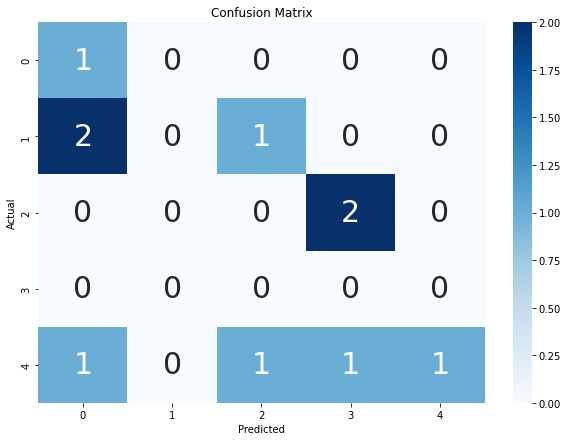

In [75]:
#checing for the accuracy score using confusion matrix
res_cm = confusion_matrix (new_Ydata, pred)
print('Confusion Matrix:\n', res_cm)
res_acc = accuracy_score(new_Ydata, pred)
print('Accuracy Score:\n', res_acc)

plt.figure(figsize = (10,7))
cm_heatmap = sns.heatmap(res_cm, annot=True, annot_kws={"size": 30},cmap='Blues')
cm_heatmap.set(title='Confusion Matrix')
cm_heatmap.set(xlabel='Predicted', ylabel='Actual')
plt.show()